In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pm4py
from datetime import date

from pm4py.objects.conversion.log import converter as xes_converter 
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.log import converter as log_converter

In [215]:
# Name			| Description
# -------------------------------------------------------------------------------
# Age			| Age in 5-year groups
# Diagnostic*		| Various checkboxes on the triage document
# DisfuncOrg		| Checkbox: Disfunctional organ
# Hypotensie		| Checkbox: Hypotension 
# Hypoxie 		| Checkbox: Hypoxia
# InfectionSuspected 	| Checkbox: Suspected infection
# Infusion 		| Checkbox: Intravenous infusion required
# Oligurie		| Checkbox: Oliguria 
# SIRSCritHeartRate	| Checkbox: One of the SIRS criteria
# SIRSCritLeucos		| Checkbox: One of the SIRS criteria
# SIRSCritTachypnea	| Checkbox: One of the SIRS criteria
# SIRSCritTemperature	| Checkbox: One of the SIRS criteria
# SIRSCriteria2OrMore	| Checkbox: Two or more of the SIRS criteria 
# Leucocytes		| Leucocytes measurement
# CRP			| CRP measurement
# LacticAcid		| Lactic-acid measurement

#what action has the most suspected infections
#what was the most frequent event

In [216]:
log = xes_importer.apply('Sepsis Cases - Event Log.xes')
events = pm4py.convert_to_dataframe(log)
eventslog = events.copy()

In [217]:
#renaming columns
events.rename(columns={'time:timestamp':'datetime', 
                         'case:concept:name':'patient', 
                         'concept:name':'name', 
                         'org:group':'group',
                          'lifecycle:transition':'transition'}, inplace=True)
pd.set_option('display.max_columns',None)
eventsrename = events.copy()

In [218]:
#calculating the relative time of each event
case_starts_ends = events.pivot_table(index='patient', aggfunc={'datetime': ['min', 'max']})
case_starts_ends = case_starts_ends.reset_index()
case_starts_ends.columns = ['patient', 'caseend', 'casestart']
events = events.merge(case_starts_ends, on='patient')
events['relativetime'] = events['datetime'] - events['casestart']

In [219]:
## Get day of week
events['weekday'] = events['datetime'].apply(lambda x: x.weekday())
events['date'] = events['datetime'].apply(lambda x: x.date())
events['startdate'] = events['casestart'].apply(lambda x: x.date())
events['hour'] = events['datetime'].apply(lambda x: x.time().hour)
## Get relative times in more friendly terms
events['relativetime_s'] = events['relativetime'].dt.seconds + 86400*events['relativetime'].dt.days
events['relativedays'] = events['relativetime'].dt.days

In [220]:
events.head()

,InfectionSuspected,group,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,name,Age,DiagnosticIC,DiagnosticSputum,DiagnosticLiquor,DiagnosticOther,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,datetime,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,transition,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,patient,Leucocytes,CRP,LacticAcid,caseend,casestart,relativetime,weekday,date,startdate,hour,relativetime_s,relativedays
0,True,A,True,True,True,True,True,True,True,ER Registration,85.0,True,False,False,False,True,True,True,2014-10-22 11:15:41+02:00,True,False,False,True,complete,A,False,True,True,A,NaN,NaN,NaN,2014-11-02 15:15:00+01:00,2014-10-22 11:15:41+02:00,0 days 00:00:00,2,2014-10-22,2014-10-22,11,0,0
1,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leucocytes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-22 11:27:00+02:00,NaN,NaN,NaN,NaN,complete,NaN,NaN,NaN,NaN,A,9.6,NaN,NaN,2014-11-02 15:15:00+01:00,2014-10-22 11:15:41+02:00,0 days 00:11:19,2,2014-10-22,2014-10-22,11,679,0
2,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-22 11:27:00+02:00,NaN,NaN,NaN,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,21.0,NaN,2014-11-02 15:15:00+01:00,2014-10-22 11:15:41+02:00,0 days 00:11:19,2,2014-10-22,2014-10-22,11,679,0
3,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LacticAcid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-22 11:27:00+02:00,NaN,NaN,NaN,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,2.2,2014-11-02 15:15:00+01:00,2014-10-22 11:15:41+02:00,0 days 00:11:19,2,2014-10-22,2014-10-22,11,679,0
4,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ER Triage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-22 11:33:37+02:00,NaN,NaN,NaN,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,2014-11-02 15:15:00+01:00,2014-10-22 11:15:41+02:00,0 days 00:17:56,2,2014-10-22,2014-10-22,11,1076,0


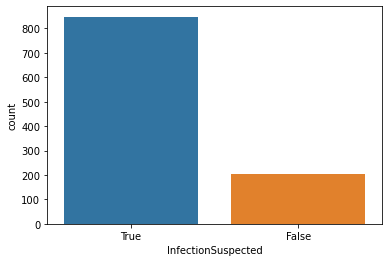

In [221]:
#total infections
sns.countplot(events['InfectionSuspected'])

In [222]:
#groups with infections
infected = events.groupby(['InfectionSuspected'])[['group']]
infected.value_counts()

InfectionSuspected  group
False               A        185
                    L         17
True                A        800
                    L         48
dtype: int64

In [223]:
#what each group was providing
namegroup = events.groupby(['group'])[['name']]
namegroup.value_counts().sort_values()

group  name            
Y      Admission NC           1
K      Admission IC           1
X      Admission NC           1
W      Admission NC           2
P      Admission NC           5
E      Release E              6
J      Admission IC           9
       Admission NC          17
K      Admission NC          17
U      Admission NC          18
E      Release D             24
V      Admission NC          25
E      Release C             25
S      Admission NC          33
T      Admission NC          35
L      IV Liquid             38
       IV Antibiotics        45
N      Admission NC          46
D      Admission NC          47
W      Admission IC          53
P      Admission IC          54
H      Admission NC          55
E      Release B             56
R      Admission NC          57
Q      Admission NC          63
L      ER Registration       65
       ER Sepsis Triage      65
M      Admission NC          84
I      Admission NC         126
G      Admission NC         148
O      Admission

In [224]:
infected = events[events['InfectionSuspected'].notna()]
infected.isna().sum()

InfectionSuspected              0
group                           0
DiagnosticBlood                 0
DisfuncOrg                      0
SIRSCritTachypnea               0
Hypotensie                      0
SIRSCritHeartRate               0
Infusion                        0
DiagnosticArtAstrup             0
name                            0
Age                            55
DiagnosticIC                    0
DiagnosticSputum                0
DiagnosticLiquor                0
DiagnosticOther                 0
SIRSCriteria2OrMore             0
DiagnosticXthorax               0
SIRSCritTemperature             0
datetime                        0
DiagnosticUrinaryCulture        0
SIRSCritLeucos                  0
Oligurie                        0
DiagnosticLacticAcid            0
transition                      0
Diagnose                      296
Hypoxie                         0
DiagnosticUrinarySediment       0
DiagnosticECG                   0
patient                         0
Leucocytes    

In [225]:
categories = ['DiagnosticBlood','DisfuncOrg','SIRSCritTachypnea','Hypotensie',
             'SIRSCritHeartRate','Infusion','DiagnosticArtAstrup','DiagnosticIC',
             'DiagnosticSputum','DiagnosticLiquor','DiagnosticOther','SIRSCriteria2OrMore',
             'DiagnosticXthorax','SIRSCritTemperature','DiagnosticUrinaryCulture','SIRSCritLeucos',
              'Oligurie','DiagnosticLacticAcid','Hypoxie','DiagnosticUrinarySediment',
              'DiagnosticECG']

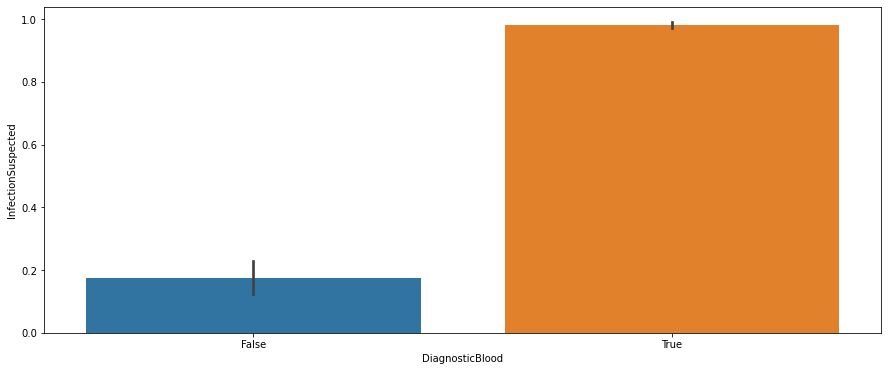

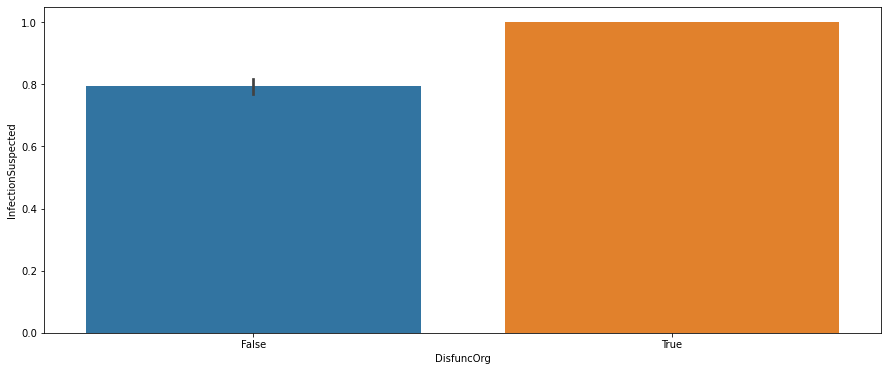

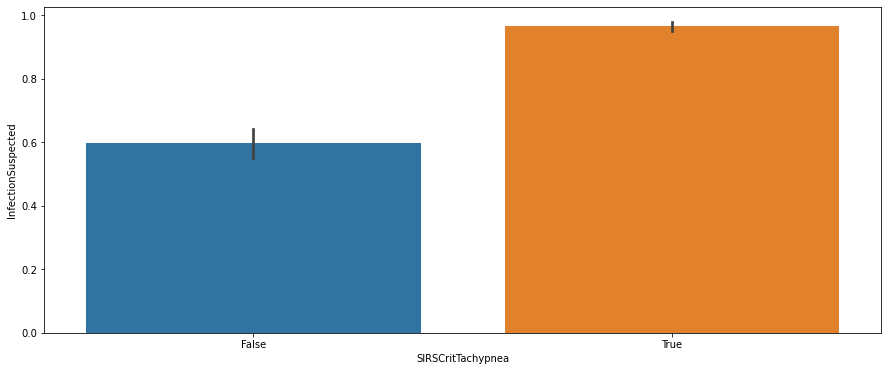

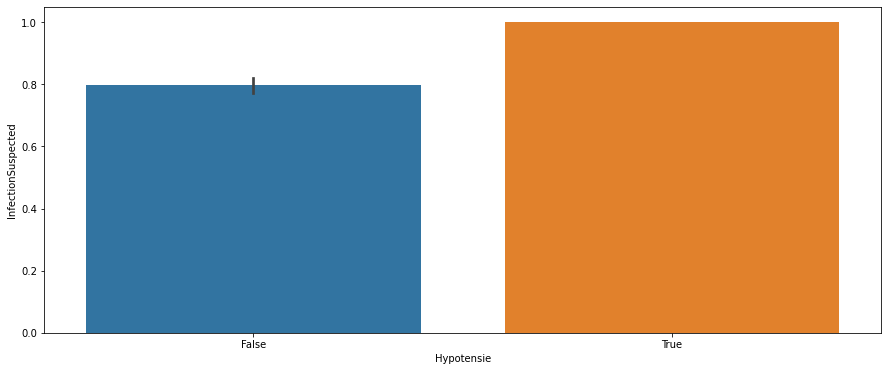

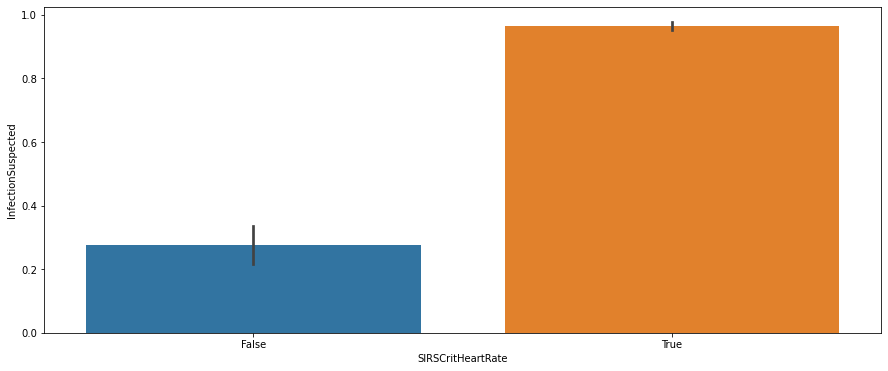

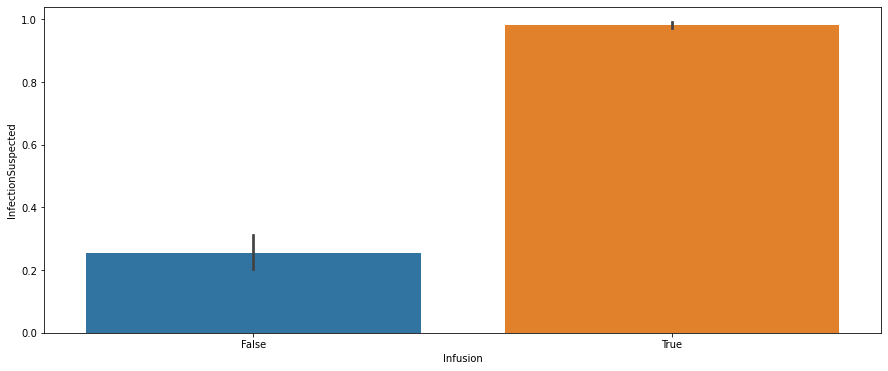

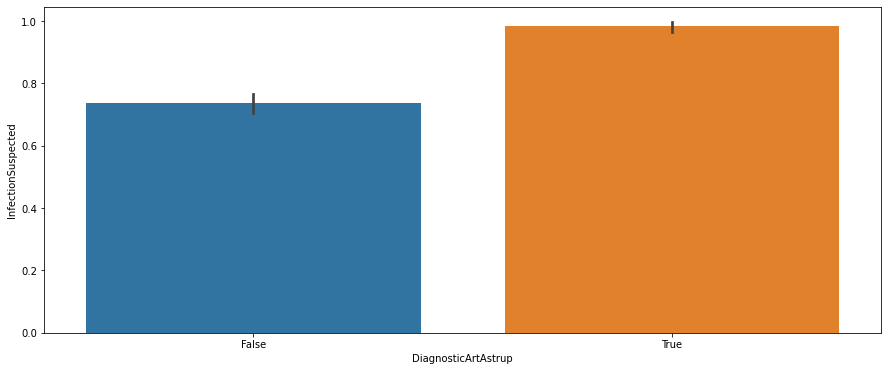

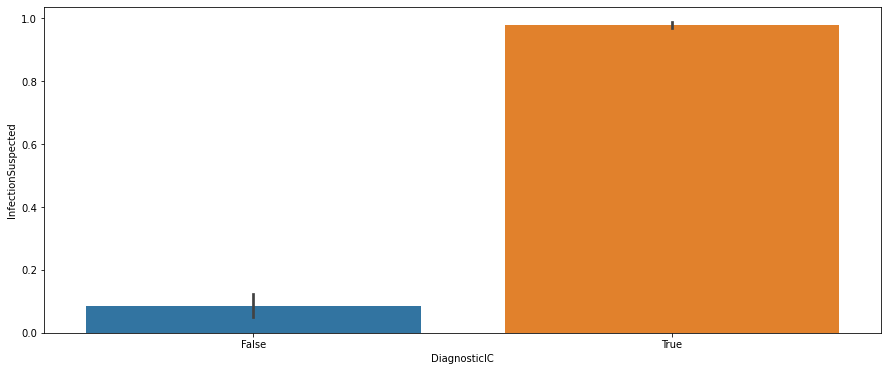

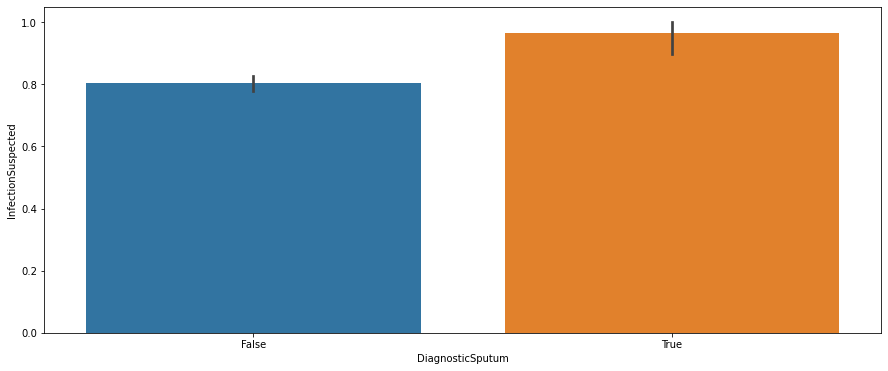

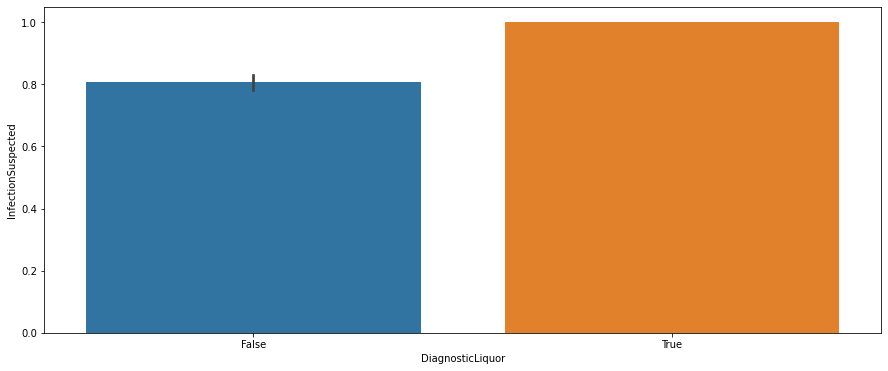

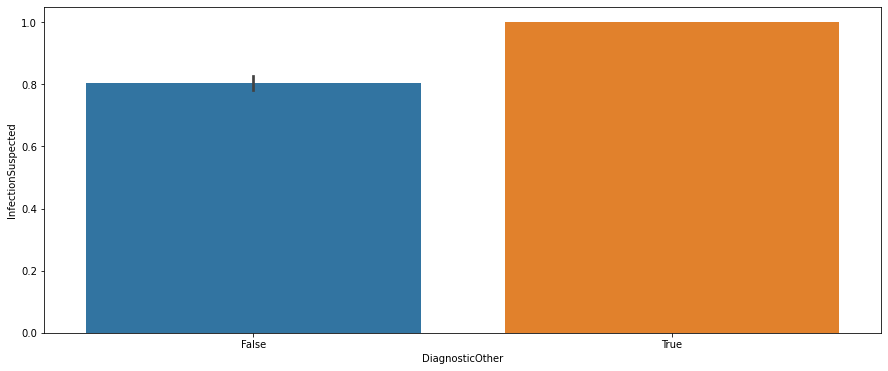

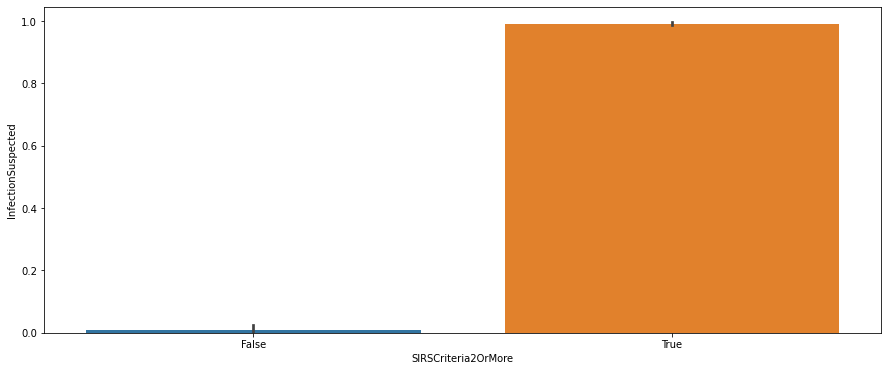

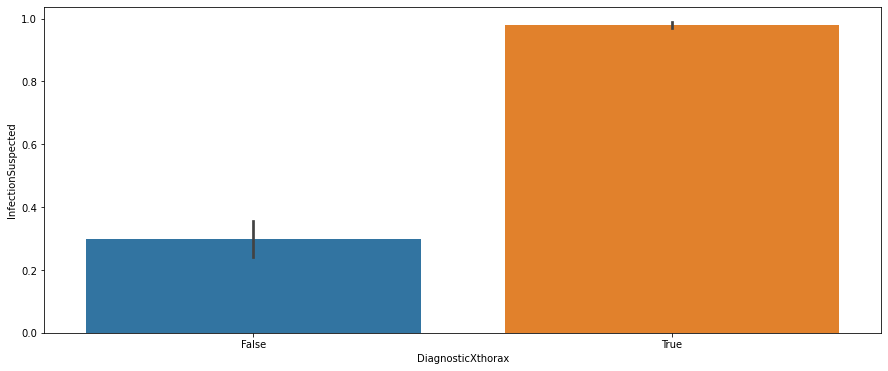

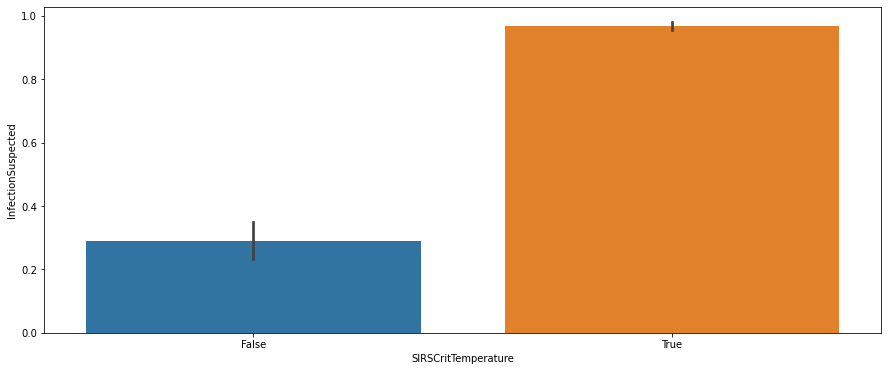

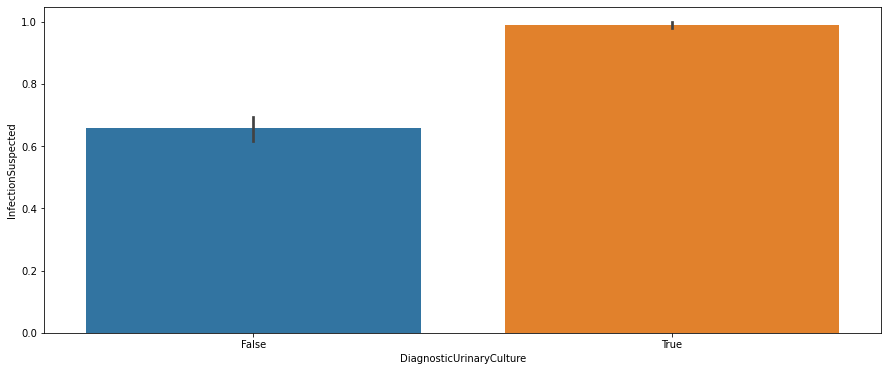

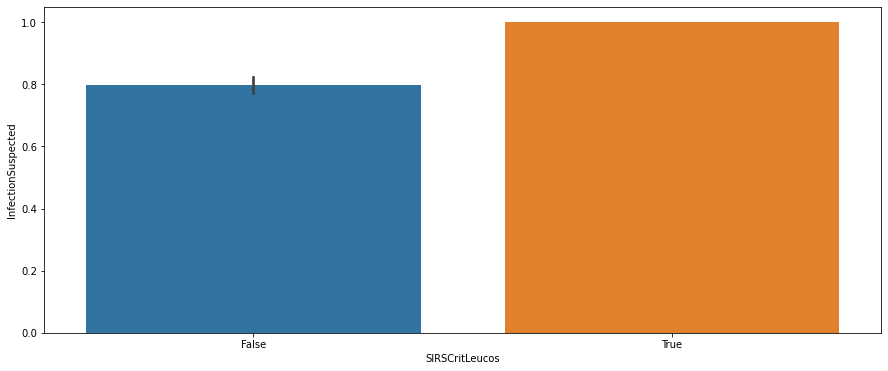

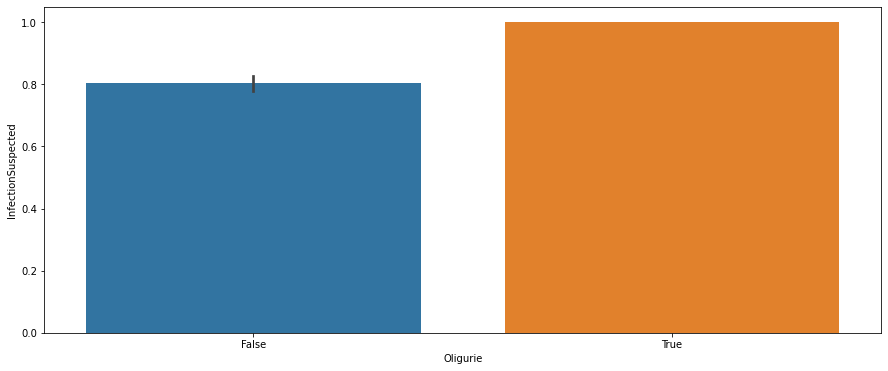

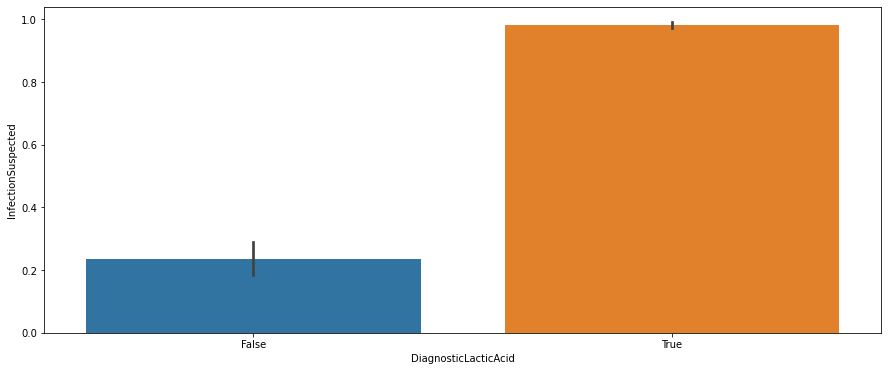

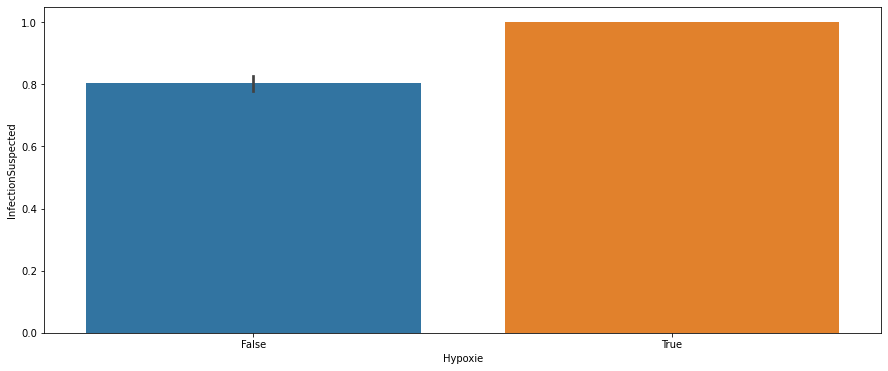

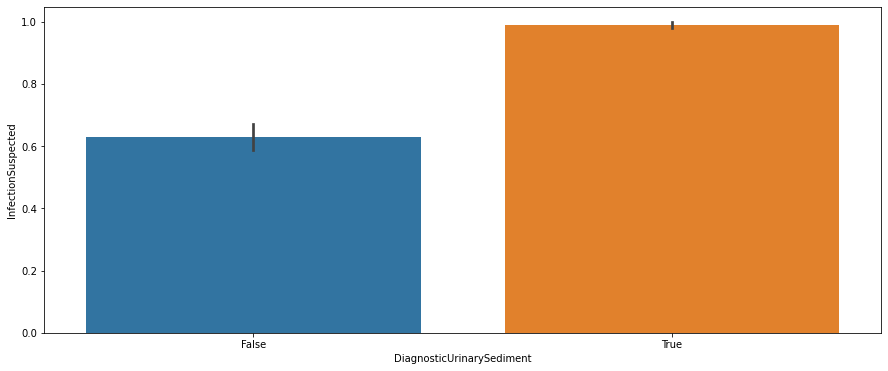

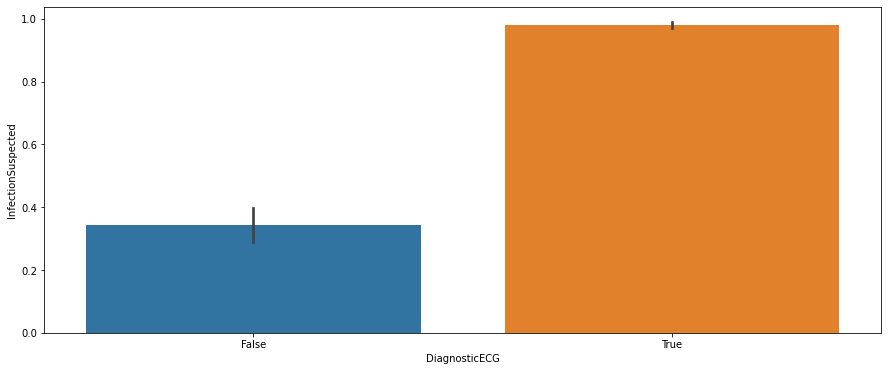

In [226]:
for i in range(len(categories)):
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    sns.barplot(data = infected, x = categories[i], y = 'InfectionSuspected')
    plt.show()

In [227]:
#from the graphs above we can see that these tests had a major impact on chance of infection
#DiagnosticBlood,SIRSCritHeartRate,Infusion,DiagnosticIC,SirsCriteria2OrMore,DianosticXThorax,SIRSCritTemperature
#DiagnosticLacticAcid,DiagnosticECG

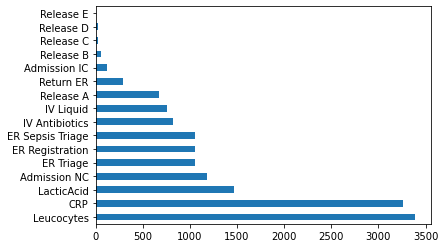

In [228]:
#most frequent
events['name'].value_counts().plot(kind='barh')

In [229]:
#on average people spend 4.3 days
events['relativedays'].mean()

4.321020113053766

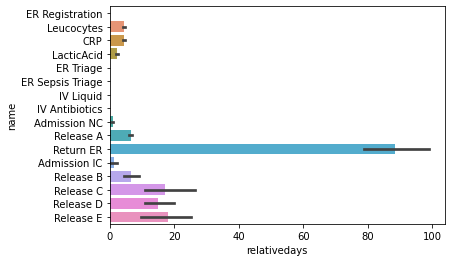

In [230]:
#average number of days for each admission
sns.barplot(data = events, y = 'name', x ='relativedays')

In [231]:
#converting back to log format
log = log_converter.apply(eventslog)

In [232]:
#alpha miner does not take into account event frequencies and no guartee on soundness
from pm4py.algo.discovery.alpha import algorithm as alpha_miner

net,initial_marking,final_marking = alpha_miner.apply(log)

In [233]:
#visualizing petri net
from pm4py.visualization.petrinet import visualizer as pn_visualizer

gviz = pn_visualizer.apply(net,initial_marking,final_marking)
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)


pn_visualizer.save(gviz, "alpha_miner_healthcare_petri_net.png")

<ipython-input-233-332d057e991c>:4: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net,initial_marking,final_marking)
<ipython-input-233-332d057e991c>:6: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking,


In [234]:
#inductive miner takes into account event frequencies ignores low frequency
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer
tree = inductive_miner.apply_tree(log)

# viz
gviz = pt_visualizer.apply(tree)

In [235]:
net, initial_marking, final_marking = inductive_miner.apply(log)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
gviz = pn_visualizer.apply(net, initial_marking, final_marking, 
                           parameters=parameters, 
                           variant=pn_visualizer.Variants.FREQUENCY, 
                           log=log)

pn_visualizer.save(gviz, "inductive_miner_healthcare_petri_net.png")

<ipython-input-235-12dd707193d2>:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(net, initial_marking, final_marking,
